In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
path = "Team Banksia_ Finding Australia’s Space Niche (Responses) - Form Responses.csv"
DataFrame = pd.read_csv(path)

# Next Steps
1. Convert MCs to Numeric
2. Scatter Plots
3. Pearson Correlation Coefficient


In [4]:
# Show the DataFrame

# First lets rename the columns into easier categories:
NewNames = {
    "Where are you in your career": "CareerStage",
    "What field are you in?": "Field",
    "How familiar are you with Australia's space sector?": "Familiarity",
    "Does the Australian space program have relevance to you?": "Relevance",
    "How many \"Space Companies\" do you think there are in Australia": "SpaceCompanyEst",
    "Do you think the Australian Space Industry is:" : "Growth",
}

DataFrame.rename(columns=NewNames, inplace=True)

DataFrame.head()

,Timestamp,CareerStage,Field,Familiarity,Relevance,SpaceCompanyEst,Growth,Do you believe space is important for Australia? Why/why not?,"In what ways do you expect the ""space sector"" to help your life in Australia?",What questions do YOU have about the Australian Space Industry?
0,1/8/2025 19:59:12,Postgrad / Masters Student,STEM,Somewhat,Yes,10-99,Stable,"Yes, there is a lot of potential for data link...",A good pool of jobs available for me after my ...,"I see a lot of communication based satellites,..."
1,1/9/2025 11:47:21,Just interested in space,Non-STEM,Not at all,Not sure,<10,Growing,Defence,NaN,NaN
2,1/9/2025 11:48:57,Working in Space Industry,STEM,Very,Yes,100-900,Growing,"Yes extremely. Sovereign capability, environme...","Space enables our everyday lives, like communi...","Who are the companies, industry leaders and ac..."
3,1/9/2025 12:17:42,Just interested in space,STEM,Somewhat,No,10-99,Growing,Yes - spaced based technologies will become mo...,Not sure.,"What do you bring to the industry that US, EU,..."
4,1/9/2025 13:18:49,Undergrad Student (Bachelors/Honours),BOTH,Not at all,Not sure,<10,Stable,yes,NaN,NaN


In [5]:


# Coerce To Working in Space Industry
coerceStrings = [
    "Own a space port and research organisation",
    "Founder",
    "Working for Binar Space Program, which is kind of both Space industry and academia, however I have worked previously in the Space industry"
]

# All the LinkedIn bros wanted to flex in the "Other" category, lets coerce them into the working in space industry category
# Loop through coerceStrings and coerce the values in the DataFrame
for string in coerceStrings:
    DataFrame.loc[DataFrame["CareerStage"] == string, "CareerStage"] = "Working in Space Industry"

Discrete = ["SpaceCompanyEst"]
Ordinal  = ["Familiarity","Growth", "Relevance"]
Nominal  = ["CareerStage", "Field"]



SpaceCompanyEstimateDict = {
 "<10": 1,
 "10-99": 10,
 "100-900": 100,
 ">1000": 1000
 }
GrowthDict = {
    "Non-existent": None, # We did not have any responses for this category
    "Shrinking": 1,
    "Stable": 2,
    "Growing": 3,
}
FamiliarityDict = {
    "Not at all":0,
    "Not really":1,
    "Somewhat":2,
    "Very":3,
}
RelevanceDict = {
    "No":0,
    "Not sure":1,
    "Yes":3,
}

# For a quick summary, loop through each of the Discree Ordinal and Categorical columns and print the counts of each category
for column in Discrete + Ordinal + Nominal:
    print(DataFrame[column].value_counts())
    print("\n")

SpaceCompanyEst
10-99      19
100-900     5
<10         4
>1000       1
Name: count, dtype: int64


Familiarity
Very          10
Somewhat       9
Not really     8
Not at all     2
Name: count, dtype: int64


Growth
Growing      20
Stable        6
Shrinking     3
Name: count, dtype: int64


Relevance
Yes         17
Not sure    10
No           2
Name: count, dtype: int64


CareerStage
Undergrad Student (Bachelors/Honours)    13
Working in Space Industry                 9
Just interested in space                  3
Postgrad / Masters Student                2
Working in Academia                       2
Name: count, dtype: int64


Field
STEM        22
BOTH         6
Non-STEM     1
Name: count, dtype: int64




# Cleanup Done! Time For the Stats!

Okay, now our dataframe is cleaned and we have definitions for our ordinal data, 
we can start to calculate correlation scores

# Methods

## Ordinal vs Ordinal:

- Spearman's rank correlation

## Nominal vs Nominal:
-  Cramer's V

## Nominal vs Ordinal/Discrete

- Point-Biserial correlation (if nominal is binary)
- Eta coefficient

# Questions We want to Ask the Data

- What do people without STEM experiance think?
- What effect does career progression have estimates on size and trajectory?
- What effects does people knowledge of the industry have on their perception of its relevance, size and trajectory?

STEM
True     22
False     7
Name: count, dtype: int64
Growth  Growing  Shrinking  Stable
STEM                              
False         4          1       2
True         16          2       4
Relevance  No  Not sure  Yes
STEM                        
False       1         5    1
True        1         5   16
Familiarity  Not at all  Not really  Somewhat  Very
STEM                                               
False                 2           1         0     4
True                  0           7         9     6
SpaceCompanyEst  10-99  100-900  <10  >1000
STEM                                       
False                3        2    2      0
True                16        3    2      1


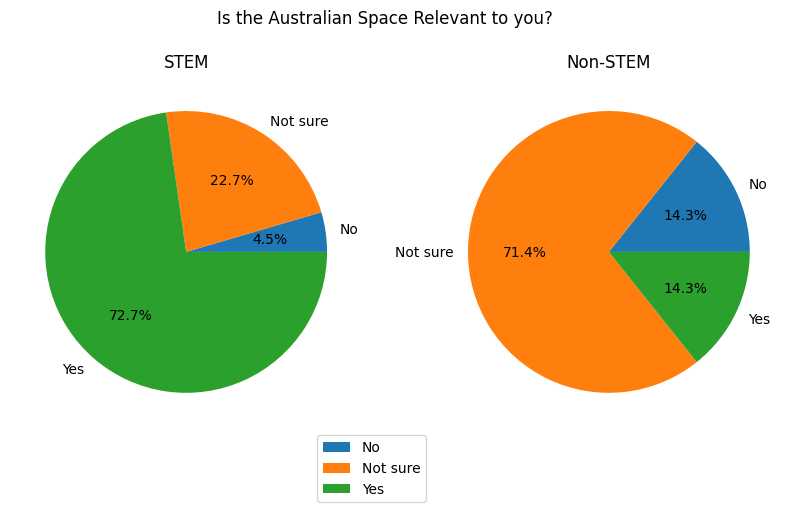

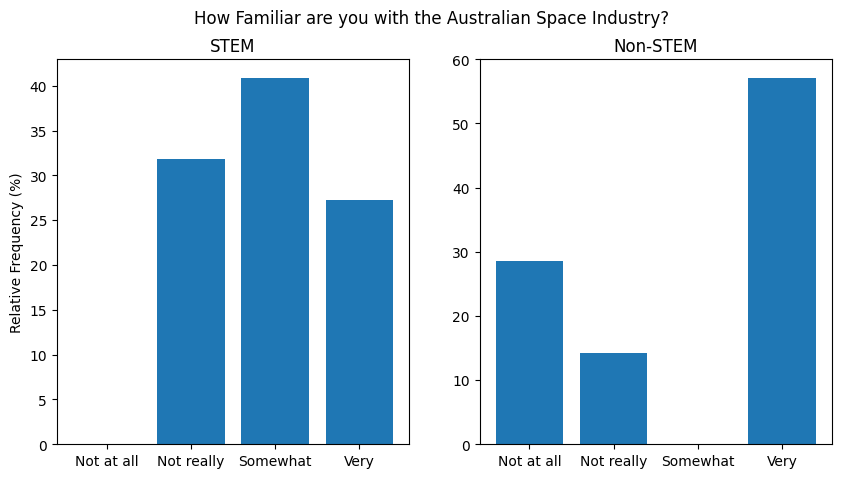

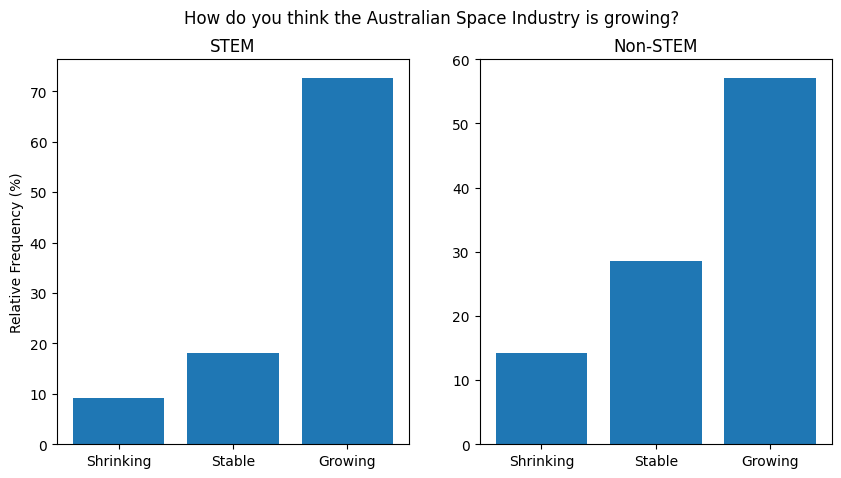

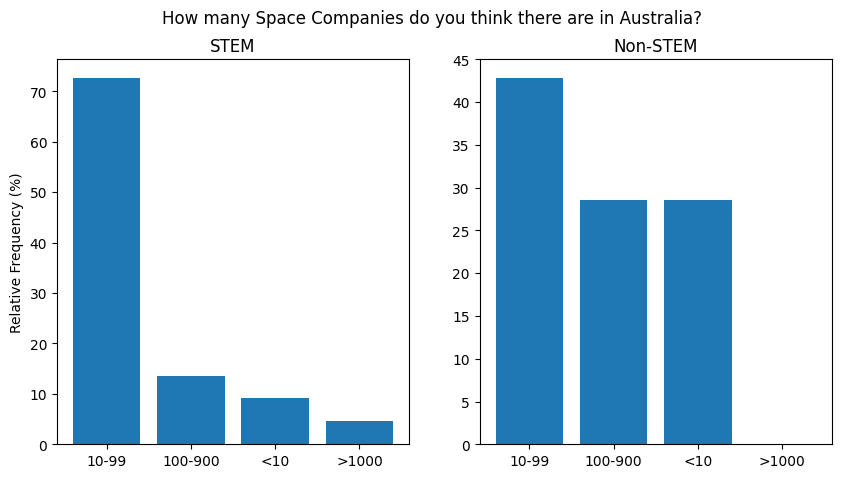

In [42]:
# Lets address the non-stem first. 
# Lets lump BOTH into the STEM bucket, since we want to know about the people who do not know STEM

# Add a new column to the DataFrame called "STEM" which is True if the Field is STEM  or BOTH 
# and False otherwise

DataFrame["STEM"] = DataFrame["Field"].apply(lambda x: x in ["STEM", "Both"])
print(DataFrame["STEM"].value_counts())

# Now lets get the Point-Biserial Correlation between the STEM and the Discrete and Ordinal columns
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency


# Lets start with Relevance
RelevanceTable = pd.crosstab(DataFrame["STEM"], DataFrame["Relevance"])
FamiliartiyTable = pd.crosstab(DataFrame["STEM"], DataFrame["Familiarity"])
GrowthTable = pd.crosstab(DataFrame["STEM"], DataFrame["Growth"])
SpaceCompanyEstTable = pd.crosstab(DataFrame["STEM"], DataFrame["SpaceCompanyEst"])

print(GrowthTable)
print(RelevanceTable)
print(FamiliartiyTable)
print(SpaceCompanyEstTable)


# ----------------------------
# Create a pair of pie-charts for the relevance of the Australian Space Industry to the respondents
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].pie(RelevanceTable.loc[True], labels=RelevanceTable.columns, autopct='%1.1f%%')
ax[0].set_title("STEM")
ax[1].pie(RelevanceTable.loc[False], labels=RelevanceTable.columns, autopct='%1.1f%%')
ax[1].set_title("Non-STEM")
# Add a legend to the top left
plt.legend( bbox_to_anchor=(0, 0))
# Add a title
fig.suptitle("Is the Australian Space Relevant to you?")
# ----------------------------
# Now lets do bar chart for familiarity
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(FamiliartiyTable.columns, FamiliartiyTable.loc[True] / FamiliartiyTable.loc[True].sum() * 100, label="STEM")
ax[0].set_title("STEM")
ax[0].set_ylabel("Relative Frequency (%)")
ax[0].set_ylim(0, 100)  # Set the same y-axis limits for both plots

ax[1].bar(FamiliartiyTable.columns, FamiliartiyTable.loc[False] / FamiliartiyTable.loc[False].sum() * 100, label="Non-STEM")
ax[1].set_title("Non-STEM")
ax[1].set_ylim(0, 100)  # Set the same y-axis limits for both plots

fig.suptitle("How Familiar are you with the Australian Space Industry?")
plt.show()
# ----------------------------
# Now Growth as a bar chart
column_order = ["Shrinking", "Stable", "Growing"]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(column_order, GrowthTable.loc[True][column_order] / GrowthTable.loc[True].sum() * 100, label="STEM")
ax[0].set_title("STEM")
ax[0].set_ylabel("Relative Frequency (%)")
ax[0].set_ylim(0, 100)  # Set the same y-axis limits for both plots

ax[1].bar(column_order, GrowthTable.loc[False][column_order] / GrowthTable.loc[False].sum() * 100, label="Non-STEM")
ax[1].set_title("Non-STEM")
ax[1].set_ylim(0, 100)  # Set the same y-axis limits for both plots

fig.suptitle("How do you think the Australian Space Industry is growing?")

# ----------------------------
# Now Space Company Estimate as a bar chart
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(SpaceCompanyEstTable.columns, SpaceCompanyEstTable.loc[True] / SpaceCompanyEstTable.loc[True].sum() * 100, label="STEM")
ax[0].set_title("STEM")
ax[0].set_ylabel("Relative Frequency (%)")
ax[0].set_ylim(0, 100)  # Set the same y-axis limits for both plots

ax[1].bar(SpaceCompanyEstTable.columns, SpaceCompanyEstTable.loc[False] / SpaceCompanyEstTable.loc[False].sum() * 100, label="Non-STEM")
ax[1].set_title("Non-STEM")
ax[1].set_ylim(0, 100)  # Set the same y-axis limits for both plots

fig.suptitle("How many Space Companies do you think there are in Australia?")
plt.show()



In [7]:
# Build a numeric DF
NumericColumns = ["Career", "Field", "Familiarity", "Relevance", "Space Company Estimate", "Growth"]
NumericDataFrame = pd.DataFrame(columns=NumericColumns)

NumericDataFrame.head()

# Fill Dictionaries With Definitions
CareerDict = {
    "Just interested in space": 0 ,
    "Undergrad Student (Bachelors/Honours)": 0 ,
    "Postgrad / Masters Student": 1 , 
    "Working in Space Industry": 2 ,
    "Working in Academia": 2 ,
    "Own a space port and research organisation": 2, #Lumping this in with working in the space industry
    "Founder": 2,
    "Working for Binar Space Program, which is kind of both Space industry and academia, however I have worked previously in the Space industry": 2,
}

FieldDict = {
    "STEM": 0,
    "Non-STEM": 1,
    "BOTH": 0
}

FamiliarityDict = {
    "Not at all": 0,
    "Not really": 1,
    "Somewhat": 2,
    "Very": 3}

RelevanceDict = {
    "Yes": 1,
    "No": 0,
    "Not sure": 0.5, # Lump not sure in with no
}

SpaceCompanyEstimateDict = {
 "<10": 1,
 "10-99": 10,
 "100-900": 100,
 ">1000": 1000
 }

GrowthDict = {
    "Non-existent": -2,
    "Shrinking": -1,
    "Stable": 0,
    "Growing": 2
}

for row in DataFrame.iterrows():
    index, data = row
    
    NumericData = {
        # "User": index,
        "Career": CareerDict[data["Where are you in your career"]],
        "Field": FieldDict[data["What field are you in?"]],
        "Familiarity": FamiliarityDict[data["How familiar are you with Australia's space sector?"]],
        "Relevance": RelevanceDict[data["Does the Australian space program have relevance to you?"]],
        "Space Company Estimate": SpaceCompanyEstimateDict[data["How many \"Space Companies\" do you think there are in Australia"]],
        "Growth": GrowthDict[data["Do you think the Australian Space Industry is:"]]
    }
    # Load it into the numeric Dataframe
    NumericDataFrame.loc[index] = NumericData

# Name the index "User"
NumericDataFrame.index.name = "User"

NumericDataFrame.head() 

KeyError: 'Where are you in your career'

In [56]:
# Plot 

In [57]:
correlation_matrix = NumericDataFrame.corr(method='spearman')
# Truncate to 2 decimal places
correlation_matrix = correlation_matrix.round(2)

correlation_matrix

,Career,Field,Familiarity,Relevance,Space Company Estimate,Growth
Career,1.00,-0.17,0.73,0.19,0.24,-0.33
Field,-0.17,1.00,-0.32,-0.19,-0.33,0.12
Familiarity,0.73,-0.32,1.00,0.23,0.54,-0.19
Relevance,0.19,-0.19,0.23,1.00,0.16,0.06
Space Company Estimate,0.24,-0.33,0.54,0.16,1.00,-0.06
Growth,-0.33,0.12,-0.19,0.06,-0.06,1.00


# Interpretation

We see some positive  corrlation between peoples Familiarity with the space industry and how many companies they think there, are. The spearman correlation coefficient is 0.56, which gives a coefficient of determination of approx 31%. 

- The further people are in their career, 
    - The more familiar they are with the industry (Strong Correlation ~53% )
    - The larger they estimate the space industry to be (Weak Correlation ~ 7.3%)
    - The correlation between career development and relevance is tiny (~1%)
- Non-STEM people are:
    - Less Familiar 
    - Think it is less relevant 
    - Estimate a smaller space industry

- The more Familiar people are with the space industry they are,
    - The more relevant they percieve it to be (weak correlation)
    - the greater their estimate of the number of companies in Australia
